# Summer Olympics Data Analysis Assignment

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('summer.csv')
df.head()

df.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [14]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [15]:

df.fillna('None',inplace=True)

df.isna().sum()

df['Country'].unique()

array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

### 1. In how many Unique cities Summer Olympics is held so far?

In [16]:
unique_cities=len(df['City'].unique())

print('In {} cities the Summer Olympics has been held so far'.format(unique_cities))

In 22 cities the Summer Olympics has been held so far


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

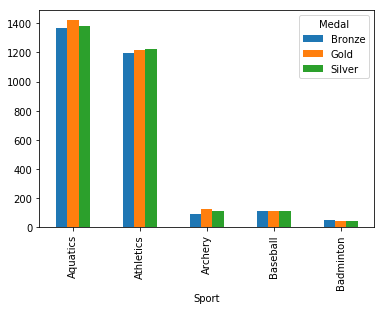

In [17]:
df.groupby('Sport')['Medal'].value_counts().head(15).sort_values(ascending=False).unstack().plot.bar()

### 3. Which sport is having most number of medals so far? (Top 5)


AQUATICS has won most number of medals.


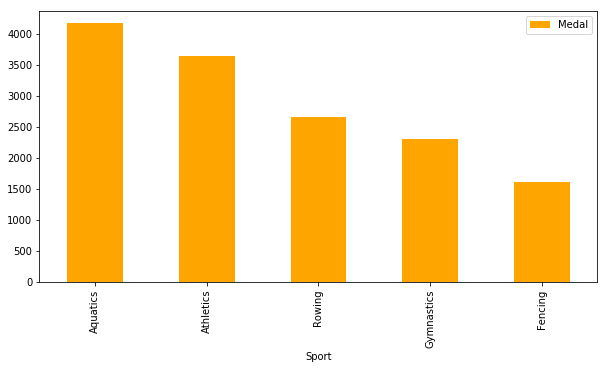

In [18]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot(x='Sport',y='Medal',kind='bar',figsize=(10,5),color='orange',legend='top-right')
print('AQUATICS has won most number of medals.')

### 4. Which player has won most number of medals? (Top 5)

Michael Phelps has won most number of medals.


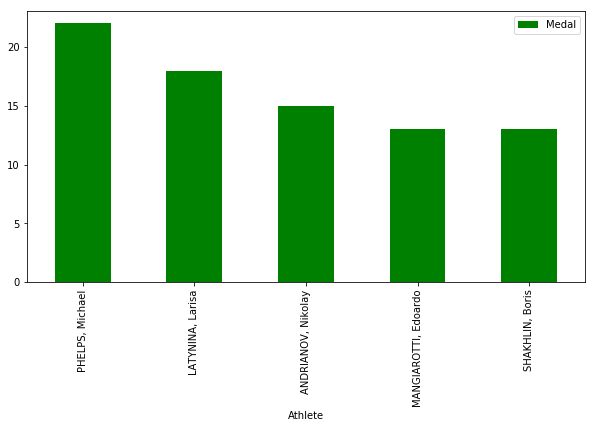

In [19]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot(x='Athlete',y='Medals',kind='bar',figsize=(10,5),color='green',legend='top-right')
print('Michael Phelps has won most number of medals.')

### 5. Which player has won most number Gold Medals of medals? (Top 5)

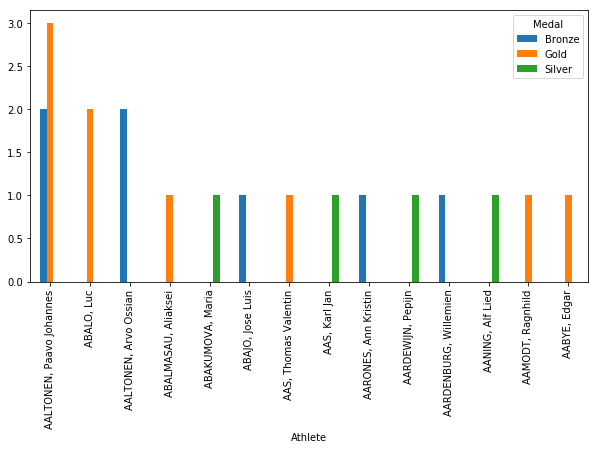

In [20]:
df.groupby('Athlete')['Medal'].value_counts().head(15).sort_values(ascending=False).unstack().plot.bar(figsize=(10,5))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [21]:
d1=df.loc[ (df['Country']=='IND') & (df['Medal']=='Gold')]
d1.head(1).sort_values(by='Year',ascending=True)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

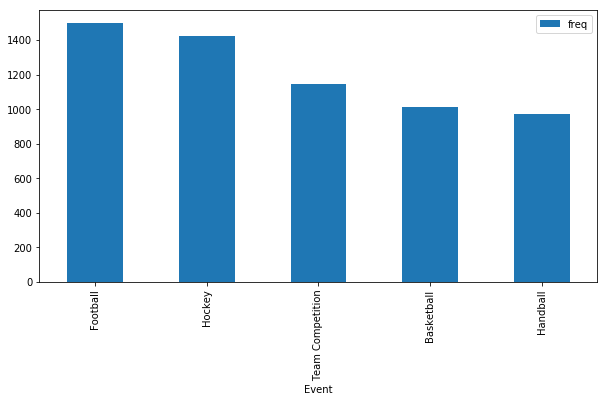

In [22]:
data = []

for event in df['Event'].unique():
    data.append([event , len(df[df['Event']  == event])])

event_details=pd.DataFrame(data,columns = ['Event','freq']).sort_values(by='freq', ascending=False)
event_details.head().plot(x = 'Event', y = 'freq', kind = 'bar', figsize = (10,5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

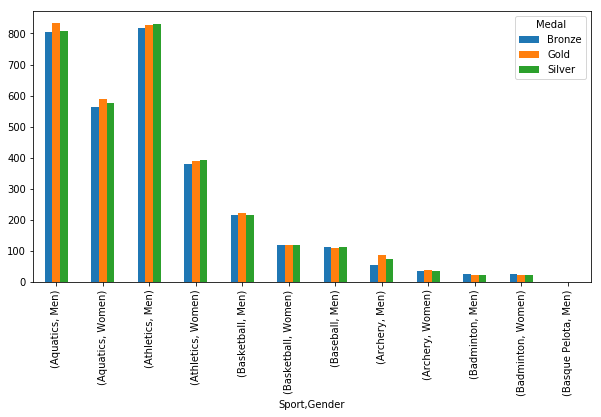

In [23]:
df.groupby(['Sport','Gender'])['Medal'].value_counts().head(35).sort_values(ascending=False).unstack().plot.bar(figsize=(10,5))